## Dataset: Swedish texts published during 2021 about *COVID-19*

### Some basic frequency exploration including also Word Clouds
`Word` clouds (text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.



**Import primary libraries** and
**download the _.csv_ file with the dataset**.

In [31]:
import numpy as np    # useful for scientific computing in Python
import pandas as pd   # primary data structure library
from PIL import Image # converting images into arrays
from io import StringIO
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# A function to dowload a .csv file which contains the dataset
def download_and_inspect_csv(url, row_index):
    # Download the CSV file and read it into a DataFrame
    df = pd.read_csv(StringIO(requests.get(url).text), sep="\t")

    # Print information about the dataset
    print('\nFile downloaded and saved!')
    print(f"The dataset consists of a total of {len(df)} posts.\n")
    df.info()
    print(f'\nThe {row_index}th text post/content/line of the dataset:')
    print(df["text"].iloc[row_index])

    return df # Return the dataframe

# Call the 'download_and_inspect_csv' function and assign the returned dataframe to a variable
# A dataframe is a data structure constructed with rows and columns, similar to
# a database or Excel spreadsheet.
df = download_and_inspect_csv("https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv", 100)


File downloaded and saved!
The dataset consists of a total of 2729 posts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2729 non-null   int64 
 1   date    2729 non-null   object
 2   genre   2729 non-null   object
 3   text    2729 non-null   object
dtypes: int64(1), object(3)
memory usage: 85.4+ KB

The 100th text post/content/line of the dataset:
Läget är mycket pressat i flera av landets regioner och i fyra län orsakar pandemin allvarlig påverkan på liv och hälsa . Det framgår av länsstyrelser rapporter till Regeringskansliet som SVT tagit del av. I den senaste rapporten, som fastställdes i går, framgår det att Östergötland, Uppsala, Gävleborg och Jönköping rapporterar en allvarlig påverkan på liv och hälsa. Inom länets kommuner är det främst belastningen på personal inom vård- och omsorg som börjar bli övermäktig skriver Länsstyrelsen i

Show **some basic exploration of the dataset's columns**

In [32]:
def display_dataset_info(df, post_index=100):
    """Displays detailed information about the dataset."""

    print("*************Example of the data:*************")
    print("*************Number of Posts in the dataset:*************")
    print(f"The dataset consists of a total of {len(df)} posts.\n")

    print("*************Shape of the data:*************")
    print(f"Dataset shape (rows, columns): {df.shape}\n")

    print("*************Category distribution of the data:*************")
    print(f"\nCategory distribution:\n{df.count()}\n")

    print("*************Category distribution of the genres:*************")
    print(f"Category distribution:\n{df['genre'].value_counts()}\n")

    print("\nDataset building complete.")

    print(f"\n*************Displaying post at index {post_index}:*************")
    if post_index < len(df):
        print(df["text"].iloc[post_index])
    else:
        print(f"No post at index {post_index}. The dataset only has {len(df)} posts.")

# Now call display_dataset_info with the dataframe
display_dataset_info(df, post_index=100)

*************Example of the data:*************
*************Number of Posts in the dataset:*************
The dataset consists of a total of 2729 posts.

*************Shape of the data:*************
Dataset shape (rows, columns): (2729, 4)

*************Category distribution of the data:*************

Category distribution:
id       2729
date     2729
genre    2729
text     2729
dtype: int64

*************Category distribution of the genres:*************
Category distribution:
genre
NEWS      857
PBLMD     768
MDCL      460
PRDCL     339
BLOG      189
ATHRTS     64
RSRCH      44
SCLMD       8
Name: count, dtype: int64


Dataset building complete.

*************Displaying post at index 100:*************
Läget är mycket pressat i flera av landets regioner och i fyra län orsakar pandemin allvarlig påverkan på liv och hälsa . Det framgår av länsstyrelser rapporter till Regeringskansliet som SVT tagit del av. I den senaste rapporten, som fastställdes i går, framgår det att Östergötland, Upps

In [33]:
import re # Import the regular expression module

def clean_text_column(df, column='text', row_index=None):
    """Lowercase, remove numbers, and strip URLs (starting with 'http') from a specified text column in the DataFrame."""

    # Lowercase the entire column
    df[column] = df[column].str.lower()

    # Remove all numbers and URLs starting with 'http'
    df[column] = df[column].apply(lambda x: re.sub(r'\b\d+\b', '', str(x)))  # Remove all numbers
    df[column] = df[column].apply(lambda x: re.sub(r'http\S+', '', str(x)))  # Remove URLs starting with 'http'

    # Optionally return the specified row after processing
    if row_index is not None and row_index < len(df):
        return df[column].iloc[row_index]
    elif row_index is not None:
        print(f"Row index {row_index} is out of range.")
        return None

cleaned_text = clean_text_column(df, 'text', row_index=999)
print(cleaned_text)

sahlgrenska har fått kassera doser: det känns förfärligt astra_zenecas vaccin har skapat starka reaktioner efter misstänkta_biverkning i_form_av blodproppar. nu kommer nya larm om att flera svenskar inte vill ta astra_zeneca_vaccin. maria taranger är överläkare på sahlgrenska sjukhuset och de har märkt av detta.


In [34]:
#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', None)
df.head() # Display only the 5 first rows of the dataframe

,id,date,genre,text
0,1,2021-01-01,NEWS,"den nya virusvarianten i storbritannien har lett till stängda gränser i omvärlden. larmet om den nya brittiska varianten av coronavirus har lett till panik och stängda gränser. men vissa experter varnar för förhastade åtgärder. - det finns inget som bevisar ökad smittsamhet, säger virologen tomas bergström. premiärminister boris_johnson har sagt att den nya varianten kan vara procent mer smittsam. foto: paul grover/shutterstock många länder har infört inreseförbud mot storbritannien de senaste veckor . foto: frank augstein/tt virologen tomas bergström varnar för förhastade slutsatser om den brittiska virusvarianten. foto: johan wingborg / göteborgs universitet statsepidemiolog anders_tegnell säger att det var rätt att stänga gränsen mot storbritannien. foto: henrik montgomery/tt efter en mycket dyster höst började det ljusna i storbritannien i december. den nationella nedstängningen som införts för att stoppa höstens virusvåg avvecklades efter_att smittspridningen minskat. kort därefter blev landet först i världen med att godkänna vaccin från pfizer/biontech. medan omvärlden såg på med avundsjuka påbörjade landet den efterlängtade vaccinationen mot covid-."
1,2,2021-01-01,NEWS,"några personer syns framför fyrverkeripjäser. människor betraktar privatfyrverkerier på senatstorget i helsingfors vid midnatt. nyårsfirandet förlöpte relativt lugnt i finland, enligt rapporter från polis och räddningsmyndigheter. många bränder sysselsatte ändå brandkårer . en brand i kuopio krävde ett människoliv. myndigheter lade på_förhand sordin på firandet med coronarestriktioner och från regioner i svenskfinland rapporteras tidigt på morgonen inga värre incidenter. polisen i helsingfors rapporterar visserligen om ett normalt livligt firande trots coronarestriktioner . särskilt mycket uppdrag fick poliser då barer stängde. siluetten av två personer syns framför en rykande fyrverkeripjäs. de offentliga fyrverkerier var mestadels inhiberade, men många privatpersoner firade med egna fyrverkerier. bilden är från stadsdelen drumsö i helsingfors. vid senatstorget i centrala helsingfors rapporteras om flitigt avfyrande av fyrverkeripjäser, trots_att det var förbjudet. den vanliga, tv-sända nyårsfest på torget, som vanligen samlar tiotusentals människor var inhiberad och ersatt med en festsändning på tv. polisen i sydvästra finland fick rapporter om många ungdomsgäng som höll större fester än vad coronarekommendationer stipulerar. polisen uppger att man i de fallen främst kontrollerade ungdomar ålder och skick. en död i brand i kuopio i kuopio inträffade en brand i ett tvåvåningshus på kvadratmeter. två personer var i huset då det började brinna. den ena lyckades rädda sig via en balkong, men den andra personen omkom i branden. eftersläckningen bedöms fortgå under morgonen. räddningspersonalen vet inte hur branden fick sin början och polisen börjar undersöka saken på morgonen. också i lahtis brann ett större egnahemshus. i lappland rapporteras om bränder i egnahemshus i kemijärvi och muonio."
2,3,2021-01-01,NEWS,"under nyårsnatten bröt polisen upp en svartklubb där man uppskattar att runt personer hade samlats i en industrifastighet i kortedala. bland gäster fanns både vad som beskrivs som vanlig allmänhet, men också ett stort antal gängkriminella. - när vi gick in tog någon tag en mikrofon och uppmanade gäster att stanna kvar och inte lämna på vår anmodan, säger insatsledaren fredrik terje."
3,4,2021-01-01,PRDCL,"denna information kommer från boken vad läkemedelsbolagen inte vill att du ska veta om vaccin skriven av dr. todd m elsner nya_vaccin innehåller (alltså inte gamla o välbeprövade: likt polio etc) fenoxietanol = frostskyddsmedel aluminium = neurotoxin som förorsakar ms, als och alzheimers (mycket giftigt!) fetaltbovint serum = aborterat koblod formaldahyd = balsameringsmedel gelatine = hämtat från djurkroppar humant albumin = protein från mänskligt blod mononatrium glutamat = förorsakar fetma och diabetes m

In [35]:
df['Length'] = df['text'].str.len()
df.tail(10)

,id,date,genre,text,Length
2719,2720,2021-12-30,PRDCL,"den trefaldige kickboxningsvärldsmästaren frederic sinistra (-) var öppet emot coronavaccin och har nu tragiskt avlidit i sviter av just covid-. detta efter_att ha själv skrivit_ut sig från sjukhuset i förtid frederic sinistra var öppet kritisk mot pandemin den belgiske kickboxarningsvärldsmästaren frederic sinistra var skeptisk till hela pandemin och var även vaccinmotståndare. nu har det rapporterats att sinistra själv har dött av covid- efter ett hjärtstillestånd i sviter av viruset. i november tvingades sinistra sökte vård för covid- av sin tränare och har sedan dess postat bilder på sociala_medier från sjukhussängen där han utryckte sin skepticism mot viruset, kritiserade vaccin och den belgiska regeringen för pandemiåtgärdernat. sinistras sista aktivet på sociala_medier var den :e december, enligt belgisk media avled han tre dagar senare av hjärtstillestånd. sinistra vägrade vaccinera_sig sinistra hann bli år gammal och vägrade ta vaccin mot viruset. han hävdade att den relativt unga åldern och hans goda form var skydd nog mot sjukdomen. i november åkte han dock på coronan, tvingades ställa_in ett träningsläger och uppsöka vård på ett sjukhus i liége. den :e december skrev han på sociala medier. tränare hade tvingat honom att uppsöka vård. sinistra skrev den :e december ut sig själv från sjukhuset, detta mot läkarens rekommendationer. på facebook skrev han följade: bara tre dagar senare avled han av andningsproblem som ledde till hjärtstopp. trots_att covid- har bevisat sig kunna ge allvarliga problem även för de som är yngre och i bra form hävdar frederics fru att hennes makes död inte beror på covid- eller något virus, utan att det var naturliga orsaker.",1690
2720,2721,2021-12-30,PRDCL,"vetenskap. den amerikanske virologen robert_malone uppfann den mrna-teknik som används i dagens coronavaccin. men nu har han blivit avstängd från twitter efter_att ha kritiserat massvaccineringen mot covid-, rapporterar rt. robert_malones twitterkonto spärrades efter_att han på onsdagen publicerat en länk till en video där det uppges att pfizers coronavaccin har orsakat mer skada än det förhindrat. vaccinet från pfizer bygger på den mrna-teknik som malone uppfann på -talet, något som användare på sociala_medier nu lyfter_fram som ironiskt. på telegram bekräftar robert_malone att hans twitterkonto har stängts av. vi visste alla att det skulle hända förr eller senare. och nu hände det. över en halv miljon följare borta på ett ögonblick. det innebär att jag måste ha träffat rätt, så_att_säga , skriver han. robert_malone har tidigare varnat för att massvaccinering mitt under en pågående pandemi kan leda till att virus muterar. han anser att det är rätt att vaccinera äldre och riskgrupper, men är skarpt kritisk till att man går så långt som att vaccinera friska barn.",1078
2721,2722,2021-12-31,NEWS,"omikronvarianten dominerande i huvudstaden. risken att hamna på sjukhus är betydligt lägre med omikronvarianten än med deltavarianten. det visar en ny stor analys av en miljon smittofall. risken för att hamna på sjukhus med omikronvarianten är en tredjedel av den som smittas av deltavarianten löper, enligt en färsk brittisk analys där över miljon smittfall ingår, rapporterar nyhetsbyrån reuters. analysen slår även fast att vaccin kan fungera väl mot omikron. - det är fortfarande för tidigt att dra definitiva slutsatser om allvarliga sjukhusfall, säger susan hopkins, medicinsk chefsrådgivare vid storbritanniens smittskyddsmyndighet ukhsa. den nya analysen har genomförts av smittskyddsmyndigheten uk health security agency (ukhsa) och universitet i cambridge och omfattar smittfall av omikron och deltafall. den visar att risken för att hamna på sjukhus med omikron är en tredjedel av risken för att hamna på sjukhus med delta. i den här analysen är risken för sjukhusinläggning lägre för omikron-fall med symtomatisk eller asymtomatisk infektion efter två eller tre doser vaccin, med en -procentig mi

In [36]:
import numpy as np

def calculate_mean_word_length(datasetX):
    if isinstance(datasetX, str):  # Check if the datasetX is a string
        words = datasetX.split()
        if words:  # Check if there are any words
            return np.mean([len(word) for word in words])
        else:
            return 0  # Return 0 if there are no words
    else:
        return 0  # Return 0 for non-string values

df['mean_word_length'] = df['text'].apply(calculate_mean_word_length)

df.tail(5)

,id,date,genre,text,Length,mean_word_length
2724,2725,2021-12-31,PBLMD,"i usa har barn med covid_19 som skrivs_in på sjukhus ökat dramatiskt under december, i flera delstater med procent. antalet är nu på samma nivå som under toppen i september, och prognosen är en fortsatt ökning. men trots ökningen tror läkare och forskare inte att omikronvarianten är farligare för barn än delta. orsaken till att så många sökt sjukhusvård är cirkulationen av både delta- och omikronvarianter , och det faktum att barnen inte är vaccinerade, menar experter som uttalar_sig i new_york_times",505,5.246914
2725,2726,2021-12-31,PBLMD,"restriktioner * varianter * snabba vändningar på nyårsdagen hoppades många att detta var året när coronavirus inte längre skulle påverka våra liv. men så blev det inte. istället blev det nya varianter, nya restriktioner och protester från olika håll. nu hoppas vi att ska präglas mindre av covid. i spelaren ovan - en årskrönika med coronatema",343,5.142857
2726,2727,2021-12-31,PRDCL,"den vaccinkritiske forskaren robert_malone var själv med och bidrog till mrna_vaccinteknikens uppkomst på -talet. nu har han blivit tystad och avstängd av den sociala mediejätten twitter - utan att få någon förklaring till den godtyckliga censuren. plötsligt stängde twitter av kontot som tillhör den mångårige vaccinforskaren utan motivering. robert_malones konto hade vid tidpunkten över 516_000 följare och det är oklart om han stängdes av på_grund_av algoritmer i twitters system eller om censuren skedde för mänsklig hand. robert_malone själv menar att han antagligen varit på twitters radar under en längre tid och han skriver vidare att hans avstängning är att betrakta som ett bakslag i kampen mot tvångsvaccinationer av barn och korruption som involverar regeringen och läkemedelsjättar . det betyder också att vi förlorat en kritisk komponent i vår strid för att stoppa att de här vaccin blir obligatoriska för barn och för att stoppa korruptionen i våra regeringar såväl_som det medicinska-industriella komplexet och läkemedelsindustrin. robert_malone som har en mångårig bakgrund som virolog och vaccinutvecklare har tidigare uppmärksammats för att med sin forskning ha bidragit till skapandet av just mrna-teknologin - som pfizers och modernas_vaccin bygger på. han är också kritisk till mycket av den repression och de åtgärder som införts under förevändningen att bekämpa viruset. enligt rt anser malone att personer i högriskgrupper kan vaccinera_sig och att han själv på_grund_av sin ålder valt att ta vaccin - men att risker för hälsosamma, friska och unga_människor och barn är allt för stora för att det ska vara lämpligt för dessa grupper att ta vaccinen. ju fler människor man vaccinerar, ju fler blir de vaccinresistenta mutationer man troligen kommer att få, ju mindre varaktiga blir vaccin , ännu kraftigare vaccin måste utvecklas och människor kommer att bli utsatta för mer_och_mer risk , har han bland_annat skrivit. robert_malone menar vidare att de vaccinpolicys som införts i många länder inte alls bygger på vetenskap och han är också kritisk till läkemedelsindustrin och den påverkan som ultraglobalister som bill_gates har på den globala hälsopolitiken. eftersom robert_malone tydligt tagit ställning mot de omfattande massvaccinationskampanjer och belyst risker med vaccin så har han också smutskastats, demoniserats och utsatts för försök till karaktärsmord av västerländska politiker och i vänsterliberala medier anklagats för att vara en konspirationsteoretiker.",2500,5.796196
2727,2728,2021-12-31,PRDCL,från och med idag måste parisbor som är över elva år bära munskydd när de lämnar sina hem. munskyddstvånget gäller även de medborgare som tagit de experimentella coronavaccinen. franska myndigheter motiverar den mycket hårda repressionen med att smittspridningen ska ha ökat under den senaste tiden på_grund_av omikronvarianten av viruset. därför tvingas såväl vuxna som äldre barn att ha på sig munskydd utomhus om de inte vill böta euro per tillfäll

In [37]:
#Mean sentence length: Average length of the sentences in the datasetX
import nltk
nltk.download('punkt')

def calculate_mean_sentence_length(datasetX):
    if isinstance(datasetX, str):  # Check if the datasetX is a string
        sentences = nltk.sent_tokenize(datasetX)
        if sentences:  # Check if there are any sentences
            return np.mean([len(sent) for sent in sentences])
        else:
            return 0  # Return 0 if there are no sentences
    else:
        return 0  # Return 0 for non-string values

df['mean_sent_length'] = df['text'].apply(calculate_mean_sentence_length)
df.tail(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,date,genre,text,Length,mean_word_length,mean_sent_length
2724,2725,2021-12-31,PBLMD,"i usa har barn med covid_19 som skrivs_in på sjukhus ökat dramatiskt under december, i flera delstater med procent. antalet är nu på samma nivå som under toppen i september, och prognosen är en fortsatt ökning. men trots ökningen tror läkare och forskare inte att omikronvarianten är farligare för barn än delta. orsaken till att så många sökt sjukhusvård är cirkulationen av både delta- och omikronvarianter , och det faktum att barnen inte är vaccinerade, menar experter som uttalar_sig i new_york_times",505,5.246914,125.500000
2725,2726,2021-12-31,PBLMD,"restriktioner * varianter * snabba vändningar på nyårsdagen hoppades många att detta var året när coronavirus inte längre skulle påverka våra liv. men så blev det inte. istället blev det nya varianter, nya restriktioner och protester från olika håll. nu hoppas vi att ska präglas mindre av covid. i spelaren ovan - en årskrönika med coronatema",343,5.142857,67.800000
2726,2727,2021-12-31,PRDCL,"den vaccinkritiske forskaren robert_malone var själv med och bidrog till mrna_vaccinteknikens uppkomst på -talet. nu har han blivit tystad och avstängd av den sociala mediejätten twitter - utan att få någon förklaring till den godtyckliga censuren. plötsligt stängde twitter av kontot som tillhör den mångårige vaccinforskaren utan motivering. robert_malones konto hade vid tidpunkten över 516_000 följare och det är oklart om han stängdes av på_grund_av algoritmer i twitters system eller om censuren skedde för mänsklig hand. robert_malone själv menar att han antagligen varit på twitters radar under en längre tid och han skriver vidare att hans avstängning är att betrakta som ett bakslag i kampen mot tvångsvaccinationer av barn och korruption som involverar regeringen och läkemedelsjättar . det betyder också att vi förlorat en kritisk komponent i vår strid för att stoppa att de här vaccin blir obligatoriska för barn och för att stoppa korruptionen i våra regeringar såväl_som det medicinska-industriella komplexet och läkemedelsindustrin. robert_malone som har en mångårig bakgrund som virolog och vaccinutvecklare har tidigare uppmärksammats för att med sin forskning ha bidragit till skapandet av just mrna-teknologin - som pfizers och modernas_vaccin bygger på. han är också kritisk till mycket av den repression och de åtgärder som införts under förevändningen att bekämpa viruset. enligt rt anser malone att personer i högriskgrupper kan vaccinera_sig och att han själv på_grund_av sin ålder valt att ta vaccin - men att risker för hälsosamma, friska och unga_människor och barn är allt för stora för att det ska vara lämpligt för dessa grupper att ta vaccinen. ju fler människor man vaccinerar, ju fler blir de vaccinresistenta mutationer man troligen kommer att få, ju mindre varaktiga blir vaccin , ännu kraftigare vaccin måste utvecklas och människor kommer att bli utsatta för mer_och_mer risk , har han bland_annat skrivit. robert_malone menar vidare att de vaccinpolicys som införts i många länder inte alls bygger på vetenskap och han är också kritisk till läkemedelsindustrin och den påverkan som ultraglobalister som bill_gates har på den globala hälsopolitiken. eftersom robert_malone tydligt tagit ställning mot de omfattande massvaccinationskampanjer och belyst risker med vaccin så har han också smutskastats, demoniserats och utsatts för försök till karaktärsmord av västerländska politiker och i vänsterliberala medier anklagats för att vara en konspirationsteoretiker.",2500,5.796196,207.416667
2727,2728,2021-12-31,PRDCL,från och med idag måste parisbor som är över elva år bära munskydd när de lämnar sina hem. munskyddstvånget gäller även de medborgare som tagit de experimentella coronavaccinen. franska myndigheter motiverar den mycket hårda repressionen med att smittspridningen ska ha ökat under den senaste tiden på_grund_av omikronvarianten av viruset. därför tvingas såväl vuxna som äldre barn att ha på sig munsky

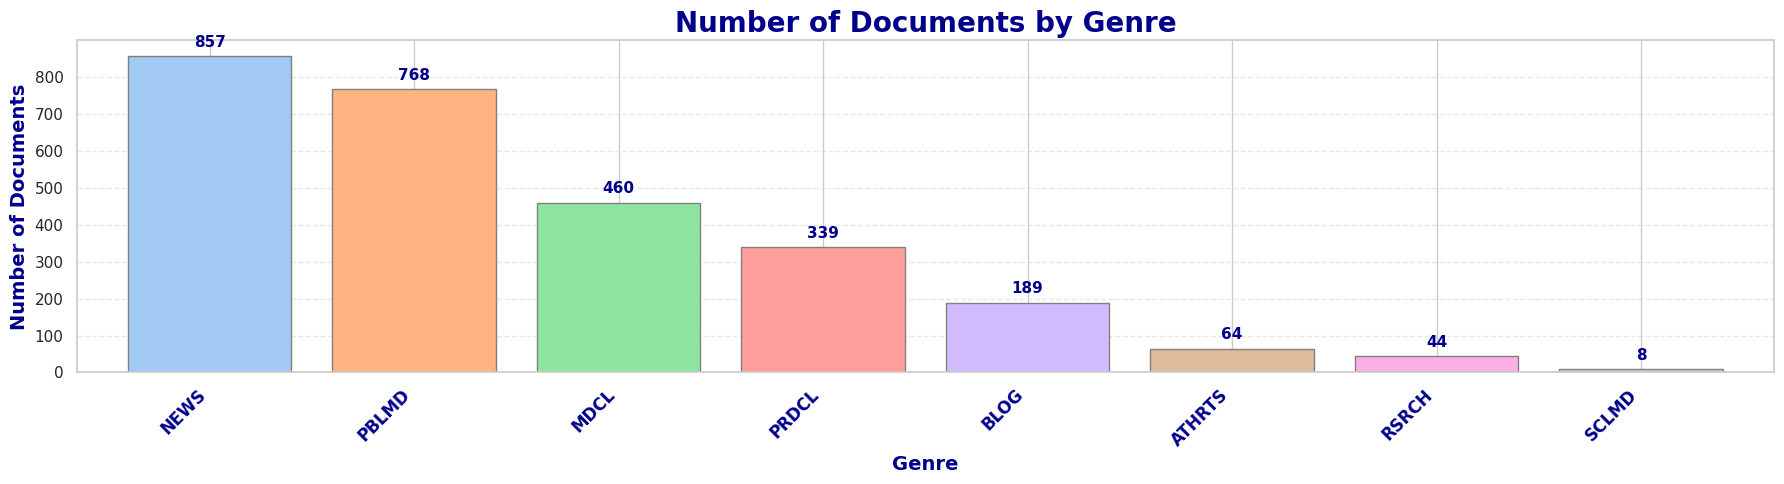

In [38]:
# Set the Seaborn style with a customized color palette
sns.set(style="whitegrid", palette="muted")

# Define a color palette and edge color for the bars
color_palette = sns.color_palette("pastel")
edge_color = 'gray'

# Create the bar plot with narrower bar width for tighter spacing
ax = df.genre.value_counts().nlargest(60).plot(
    kind='bar',
    figsize=(18, 5),
    color=color_palette,
    edgecolor=edge_color,
    width=0.8  # Adjust bar width for tighter spacing
)

# Add title and labels with improved fonts and weights
plt.title("Number of Documents by Genre", fontsize=20, weight='bold', color='darkblue')
plt.ylabel('Number of Documents', fontsize=14, weight='bold', color='darkblue')
plt.xlabel('Genre', fontsize=14, weight='bold', color='darkblue')

# Rotate the x-axis labels for readability and adjust their font
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold', color='darkblue')

# Customize the y-axis grid
plt.grid(axis='y', linestyle='--', alpha=0.5, color='lightgray')

# Add values on top of the bars with improved annotation styling
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=11, weight='bold', color='darkblue')

# Apply a tight layout to reduce padding
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
import seaborn as sns
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt

def plot_word_frequency(words, top_n=20):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)

    # Create a DataFrame from the word frequencies
    df_word_freq = pd.DataFrame(word_freq.most_common(top_n), columns=["Word", "Count"])

    # Set Seaborn style for better aesthetics
    sns.set(style="whitegrid")

    plt.figure(figsize=(18, 6))

    # Add title and labels with larger font size and bold title
    plt.title("The 40 most frequent tokens in the Dataset - Including stop words and punctuation", fontsize=20, weight='bold')
    plt.ylabel("Number of occurrences\nAntal förekomster", fontsize=14)
    plt.xlabel("Word/Ordförekomst", fontsize=14)

    # Pass the DataFrame to sns.barplot with a color palette
    plot = sns.barplot(x="Word", y="Count", data=df_word_freq, palette="Blues_d")

    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add counts on top of each bar for better clarity
    for p in plot.patches:
        count_value = int(p.get_height())
        if count_value >= 1000:
            plot.annotate(f'{count_value}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom',  # Change 'va' to 'bottom' to place the text above the bar
                          xytext=(0, 8), textcoords='offset points', fontsize=10, rotation=90)  # Rotate text 90 degrees
        else:
            plot.annotate(f'{count_value}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 8), textcoords='offset points', fontsize=10)

    # Apply a tight layout for better spacing
    plt.tight_layout()

    return plot

**Example usage, assuming *`df["text"]`* contains text data:**


<ipython-input-39-183541ba5930>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'The 40 most frequent tokens in the Dataset - Including stop words and punctuation'}, xlabel='Word/Ordförekomst', ylabel='Number of occurrences\nAntal förekomster'>

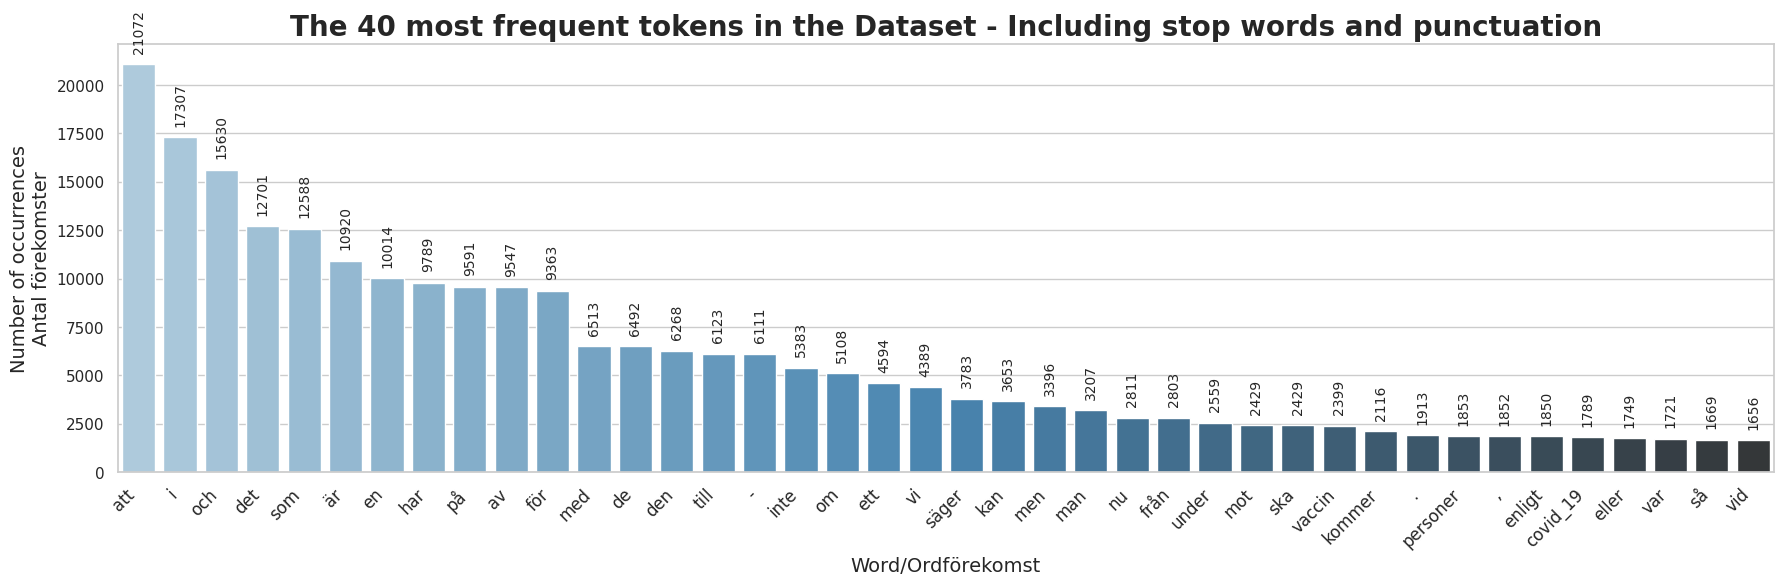

In [40]:
plot_word_frequency(df["text"].str.cat(sep=' ').split(), top_n=40)

**Some basic cleaning (removing HTML tags and URLs) of the dataset's column: '*text*'**

In [41]:
import re

def remove_html_tags(text):
    # Handle non-string values
    if not isinstance(text, str):
        return text  # Return the original value if it's not a string
    re_html = re.compile('<.*?>')
    return re_html.sub(r'', text)
df["text"] = df["text"].apply(remove_html_tags)

#Removing URL Tags
def remove_url(text):
    # Handle non-string values
    if not isinstance(text, str):
        return text  # Return the original value if it's not a string
    #re_url = re.compile(r'https?://\S+|www\.\S+')
    re_url = re.compile(r'https?://[^\s/$.?#].[^\s]*|www\.[^\s/$.?#].[^\s]*')
    #return re_url.sub('[URL REMOVED]', text)
    return re_url.sub(r'', text)

df["text"] = df["text"].apply(remove_url)
df["text"][5]

" det nya normala , sades procent fler gånger i samtal mellan chefer och investerare under jämfört med . new_york_times har tillsammans med analysföretaget sentieo kartlagt företagsfraser som blev det nya normala i usa det gångna året. undersökningen har tittat på fler än . olika presentationer och analyserat hur företagsspråket förändrades i usa under pandemiåret . de fann ett par återkommande formuleringar som användes i möten mellan chefer och investerare för att beskriva den nya tillvaron. unprecedented times , vilket skulle kunna översättas till tider utan motstycke , ökade mest i användning. det nämndes i . samtal det gångna året, en ökning med över . procent jämfört med då det bara yttrades tre gånger. hade du frågat mig vad som verkligen boomat på engelska så är det just 'unprecedented times'. jag får mycket mejl från usa och i dem nämns det nästan alltid. samma sak med 'take care of yourself' eller 'stay safe' , säger stefan öberg, vd på tradera. även arbeta hemifrån ökade sig

In [42]:
import string

# Define the punctuations to be removed, excluding the underscore
# Remove hyphens (-) and slashes (/), but only if they are not followed by a character.
PUNCTUATIONS = string.punctuation.replace('_', '').replace('-', '').replace('/', '')

def remove_punctuation(text):
    if isinstance(text, str):  # Check if the value is a string
        # Step 1: Remove all other punctuation except _ - /
        text = text.translate(str.maketrans('', '', PUNCTUATIONS))

        # Step 2: Use regex to remove hyphen (-) and slash (/) only if not followed by a character
        # Matches `-` or `/` if followed by space, end of line, or nothing
        text = re.sub(r'[-/](?=\s|$)', '', text)

        return text
    else:
        return text  # Return the original value if it's not a string

# Assuming 'df' is a pandas DataFrame and 'text' column exists
df["text"] = df["text"].apply(lambda text: remove_punctuation(text))

# Show the result of the 6th row
print(df["text"][5])

 det nya normala  sades procent fler gånger i samtal mellan chefer och investerare under jämfört med  new_york_times har tillsammans med analysföretaget sentieo kartlagt företagsfraser som blev det nya normala i usa det gångna året undersökningen har tittat på fler än  olika presentationer och analyserat hur företagsspråket förändrades i usa under pandemiåret  de fann ett par återkommande formuleringar som användes i möten mellan chefer och investerare för att beskriva den nya tillvaron unprecedented times  vilket skulle kunna översättas till tider utan motstycke  ökade mest i användning det nämndes i  samtal det gångna året en ökning med över  procent jämfört med då det bara yttrades tre gånger hade du frågat mig vad som verkligen boomat på engelska så är det just unprecedented times jag får mycket mejl från usa och i dem nämns det nästan alltid samma sak med take care of yourself eller stay safe  säger stefan öberg vd på tradera även arbeta hemifrån ökade signifikant med  procent den

First, install the `word_cloud` package.
`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the "segregation" dataset and work with an example that involves analyzing text data. First, download a _.csv_ file of the dataset.


In [43]:
# install wordcloud
!pip install wordcloud
#Import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

Next, let's use the **stopwords**. We use the function *set* to remove any redundant stopwords.

In [44]:
import requests
from wordcloud import STOPWORDS

def load_swedish_stopwords(url, stopwords=STOPWORDS, verbose=True):
    """Downloads and adds Swedish stop words from a given URL to the stopwords set."""

    # Download the stopwords file
    response = requests.get(url)
    if response.status_code == 200:
        # Split lines to obtain individual stop words
        custom_stopwords = response.text.splitlines()

        # Update the stopwords set
        stopwords.update(custom_stopwords)

        if verbose:
            print("\nThe Swedish stop words are loaded!")
            print(f"There are a total of {len(stopwords)} stop words to be applied.")

        return stopwords
    else:
        print("Failed to download the stop words file.")
        return None



stopwords = load_swedish_stopwords("https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/main/lexical-resources/sv_stopwords_extended.txt")


The Swedish stop words are loaded!
There are a total of 1529 stop words to be applied.


<ipython-input-45-9b5516bcfe24>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'The 40 most frequent words in the Dataset - After removing stop words and punctuation'}, xlabel='Word/Ordförekomst', ylabel='Number of occurrences\nAntal förekomster'>

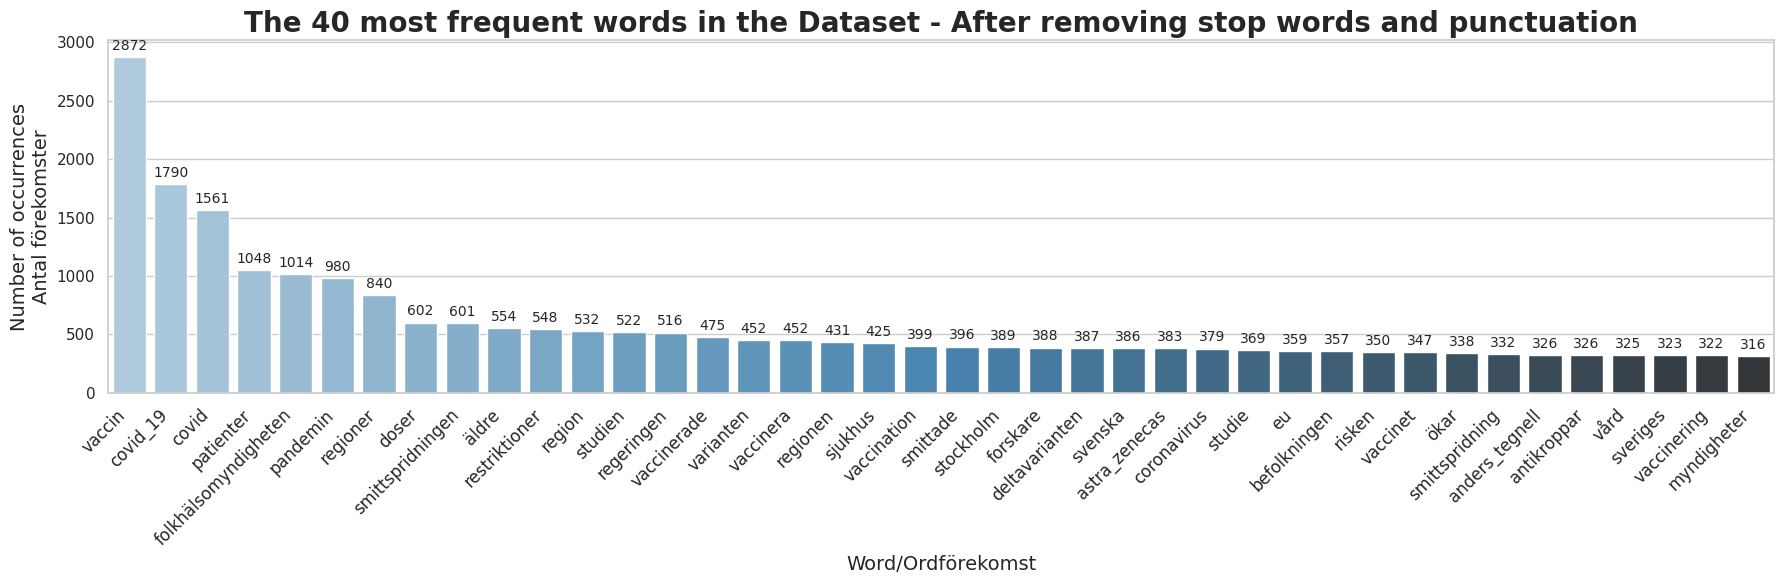

In [45]:
def plot_word_frequency2(words, top_n=25):
    """Function to plot the word frequencies"""

    # Filter out stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stopwords]

    word_freq = FreqDist(filtered_words)

    # Create a DataFrame from the word frequencies
    df_word_freq = pd.DataFrame(word_freq.most_common(top_n), columns=["Word", "Count"])

    # Set Seaborn style for better aesthetics
    sns.set(style="whitegrid")

    plt.figure(figsize=(18, 6))

    # Add title and labels with larger font size and bold title
    plt.title("The 40 most frequent words in the Dataset - After removing stop words and punctuation", fontsize=20, weight='bold')
    plt.ylabel("Number of occurrences\nAntal förekomster", fontsize=14)
    plt.xlabel("Word/Ordförekomst", fontsize=14)

    # Pass the DataFrame to sns.barplot with a color palette
    plot = sns.barplot(x="Word", y="Count", data=df_word_freq, palette="Blues_d")

    # Rotate the x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add counts on top of each bar for better clarity
    for p in plot.patches:
        plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 8), textcoords='offset points', fontsize=10)

    # Apply a tight layout for better spacing
    plt.tight_layout()

    return plot

# Example usage, assuming `df["text"]` contains text data:
plot_word_frequency2(df["text"].str.cat(sep=' ').split(), top_n=40)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 150 words in the dataset.

In [46]:
!pip install wordcloud
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS # Import the WordCloud class

# Define a custom colormap
colors = ["#FF6347", "#FFD700", "#ADFF2F", "#40E0D0", "#8A2BE2"]  # Example colors
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Create a WordCloud object with the custom colormap
wordcloud = WordCloud(
   # background_color='white',
    max_words=200,
    min_word_length=3,
    min_font_size=6,
    max_font_size=65,
    stopwords=stopwords, #the updated: 1550
    colormap=cmap
)

# Generate the word cloud from text data
text = ' '.join(df['text'].astype(str))
wordcloud.generate(text)

The most common words in the dataset are now removed. We can resize the cloud so that we can see the less frequent words a little better.

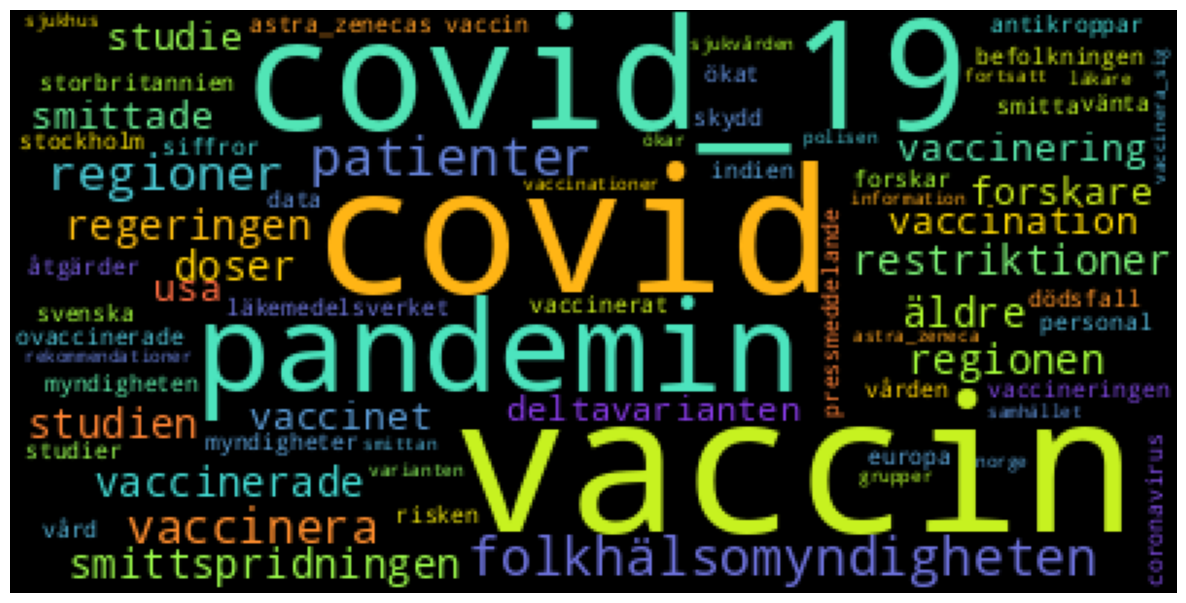

In [47]:
# Display the WordCloud
plt.figure(figsize=(12, 6))  # Set figure size for better proportions
plt.imshow(wordcloud, interpolation='antialiased')  # Use 'bilinear' interpolation for smoother image
plt.axis('off')  # Remove axes for a cleaner look
plt.tight_layout(pad=0.5)  # Adjust layout with padding

# Show the plot
plt.show()

Better! However, we want to exclude some non-informative word or VERY frequent words from the cloud. So we can add new stopwords and re-generate the cloud.

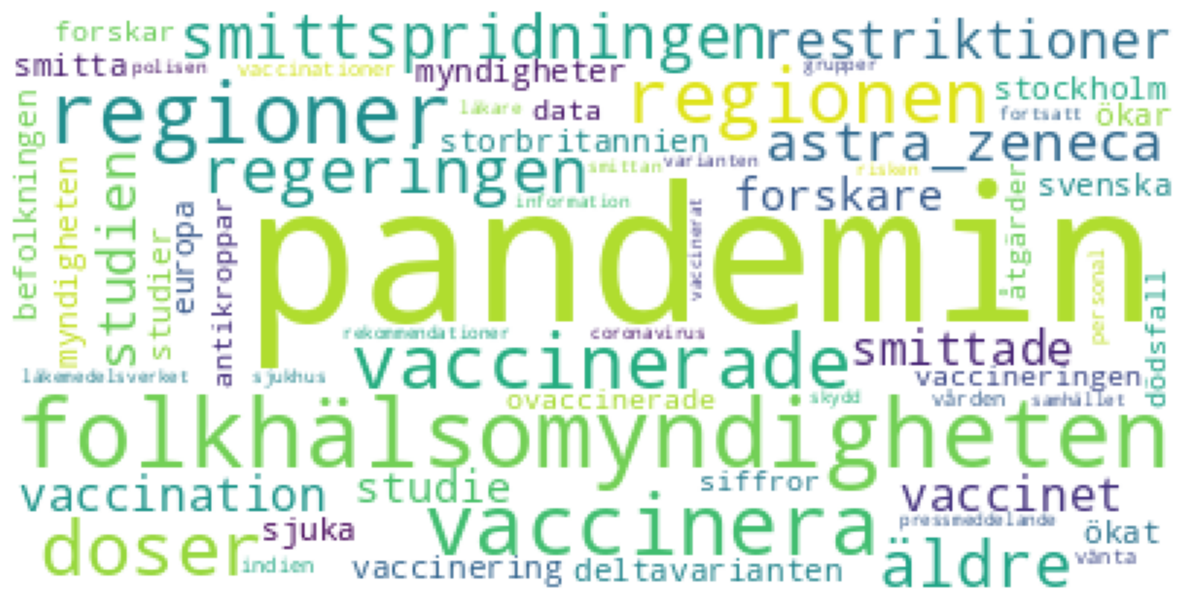

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#from wordcloud import STOPWORDS

# Extend the existing stopwords set with additional words
custom_stopwords = {'covid', 'vaccin', 'covid_19','patienter','...', 'another_word_to_remove'}  # Add your custom stopwords here
stopwords = stopwords.union(custom_stopwords)  # Combine existing stopwords with custom ones

# Create a WordCloud object with the updated stopwords and a colorful colormap
wordcloud = WordCloud(
    background_color='white',
    max_words=200,
    min_word_length=4,
    min_font_size=6,
    max_font_size=65,
    stopwords=stopwords,
    colormap='viridis'  # Use a colorful colormap
)

# Generate the word cloud from text data
text = ' '.join(df['text'].astype(str))
wordcloud.generate(text)

# Display the WordCloud
plt.figure(figsize=(12, 6))  # Set figure size for better proportions
plt.imshow(wordcloud, interpolation='antialiased')  # Use 'bilinear' interpolation for smoother image
plt.axis('off')  # Remove axes for a cleaner look
plt.tight_layout(pad=0.5)  # Adjust layout with padding

# Show the plot
plt.show()

### Lets look at unigrams and now even bigrams again

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

def get_top_n_words(corpus, top_k, n):
    """
    Function to get the top k most frequent words in the given corpus.
    Parameters:
        corpus (list): List of text documents.
        top_k (int): Number of top words to return.
        n (int): n-gram range. Specifies the range of n-grams to consider (e.g., 1 for unigrams, 2 for bigrams, etc.).
    Returns:
        list: List of tuples containing the top k words and their frequencies.
    """
    # Check if corpus is a list and contains strings
    if not isinstance(corpus, list) or not all(isinstance(doc, str) for doc in corpus):
        raise TypeError("Corpus must be a list of strings.")

    # Initialize CountVectorizer with specified n-gram range and stop words
    #stopwords_list = list(stopwords) #This was causing the error
    stopwords_list = stopwords.words('swedish') #Fixes the error by calling the words method with the appropriate language
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords_list)

    # Fit the vectorizer to learn vocabulary and transform the corpus
    bag_of_words = vec.fit_transform(corpus)

    # Calculate the sum of word occurrences in the entire corpus
    sum_words = bag_of_words.sum(axis=0)

    # Create a list of tuples containing words and their frequencies
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # Sort the list of tuples by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Return the top k words and their frequencies
    return words_freq[:top_k]

#Removing HTML Tags and URLs, and apply the function to each element in the Series
import re
def remove_html_tags(text):
    # Handle non-string values
    if not isinstance(text, str):
        return text  # Return the original value if it's not a string
    re_html = re.compile('<.*?>')
    return re_html.sub(r'', text)
df["text"] = df["text"].apply(remove_html_tags)

#Removing URL Tags
def remove_url(text):
    # Handle non-string values
    if not isinstance(text, str):
        return text  # Return the original value if it's not a string
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)
df["text"] = df["text"].apply(remove_url)

In [50]:
# Ensure that the 'text' column contains only strings
df['text'] = df['text'].astype(str)  # Convert the 'text' column to string type

In [51]:
print(df["text"][99:103],"\n")
print(df["text"][200])

99                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [52]:
!pip install nltk
import nltk
import plotly.express as px
import re

from nltk.corpus import stopwords
nltk.download('stopwords') # Download stopwords if not already downloaded
stopwords_list = stopwords.words('swedish') # Specify language for stopwords

# Function to remove standalone numbers
def preprocess_text(text):
    # Remove standalone numbers (not attached to any characters)
    return re.sub(r'\b\d+\b', '', text)

# Preprocess the 'text' column to remove standalone numbers
df['text'] = df['text'].apply(preprocess_text)

# Create a list of strings from the 'text' column
corpus = df['text'].tolist()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
import pandas as pd
from collections import Counter
import plotly.express as px
import string

url = "https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv"
s=requests.get(url).text
df=pd.read_csv(StringIO(s), sep = "\t")
df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(lambda x: re.sub(r'\b\d+\b', '', str(x))) # Apply the re.sub function to each element of the Series

# Assuming df['text'] contains the raw text data
# Tokenize the text and include stop words and punctuation
all_tokens = [token for text in df['text'] for token in text.split()]  # Split by whitespace, keeping punctuation

# Calculate the frequency of each token
token_counter = Counter(all_tokens)

# Get the 40 most common tokens and their frequencies
common_tokens = token_counter.most_common(40)

# Unpack tokens and frequencies
tokens, freq = zip(*common_tokens)

# Create bar chart for the top 40 tokens
fig = px.bar(
    x=tokens, y=freq,
    title='<b>Top 40 tokens, <i>including</i> stop words and punctuation in the COVID-19 [2021] Dataset/Corpus</b>',
   # title={'text': "<b>Top 40 tokens, including stop words and punctuation in the COVID-19 [2021] dataset</b>", 'font': {'size': 20}},
    labels={'x': 'Tokens', 'y': 'Token Count'},
    color=freq,  # Optional: color based on frequency
    color_continuous_scale='Blues',  # Optional: color scale
    text=freq  # Add text labels on the bars
)

# Update layout for aesthetics
fig.update_layout(
    template='ggplot2',
    title={'text': "<b>Top 40 tokens, <i>including</i> stop words and punctuation in the COVID-19 [2021] Dataset/Corpus</b>", 'x': 0.5, 'xanchor': 'center'},
    xaxis_title="<b style='font-size: 20px;'>Tokens</b>",  # Increase font size for x-axis title
    yaxis_title="<b style='font-size: 20px;'>Token Count</b>",  # Increase font size for y-axis title
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for better readability
        title_font=dict(size=16),  # Increase font size for x-axis title
        tickfont=dict(size=14)  # Increase font size for x-axis tick labels
    ),
    yaxis=dict(
        title_font=dict(size=16),  # Increase font size for y-axis title
        tickfont=dict(size=14)  # Increase font size for y-axis tick labels
    ),
    margin=dict(l=20, r=20, t=40, b=80)  # Adjust margins to accommodate longer labels
)

# Update traces for text labels
fig.update_traces(
    texttemplate='%{text}',  # Show frequency on the bars
    textposition='outside',
    textfont=dict(size=12, color='black', family='Arial, sans-serif', weight='bold')  # Bold font for labels
)

# Show the plot
fig.show()

In [54]:
# Get top 40 common words - Call the get_top_n_words function
common_words = get_top_n_words(corpus, 40, 1)

In [55]:
# Unpack words and frequencies
word, freq = zip(*common_words)

# Create bar chart with frequency labels
fig = px.bar(
    x=word, y=freq,
    title='Top 40 Words (Unigrams) in the COVID-19 [2021] dataset',
    labels={'x': 'Unigrams', 'y': 'Word Count'},
    color=freq,  # Optional: add color based on frequency
    color_continuous_scale='Blues',  # Optional: color scale
    text=freq  # Add text labels on the bars
)

# Update layout for improved aesthetics
fig.update_layout(
    template='ggplot2',
    #title={'x': 0.5, 'xanchor': 'center'},  # Removed redundant 'text' key, using shorter version
    #title={'text': "<b>Top 40 Unigrams in the COVID-19 [2021] dataset</b>", 'x': 0.5, 'xanchor': 'center'},
    title={
        'text': "<b>Top 40 Unigrams in the COVID-19 [2021] dataset <i>without</i> stop words and punctuation</b>",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=20)  # Increase font size for the title
    },
    xaxis_title="<b style='font-size: 20px;'>Unigrams</b>",  # Increase font size for x-axis title
    yaxis_title="<b style='font-size: 20px;'>Word Count</b>",  # Increase font size for y-axis title
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for better readability
        title_font=dict(size=16),  # Increase font size for x-axis labels
        tickfont=dict(size=14)  # Increase font size for x-axis tick labels
    ),
    yaxis=dict(
        title_font=dict(size=16),  # Increase font size for y-axis labels
        tickfont=dict(size=14)  # Increase font size for y-axis tick labels
    ),
    margin=dict(l=20, r=20, t=40, b=80)  # Adjust margins to accommodate longer labels
)

# Update traces to show text labels with improved aesthetics
fig.update_traces(
    texttemplate='%{text}',
    textposition='outside',
    textfont=dict(size=12, color='black', family='Arial, sans-serif', weight='bold')  # Set bold font for labels
)

# Show plot
fig.show()

In [56]:
import plotly.express as px

# Get top 50 common bigrams
common_words = get_top_n_words(corpus, 40, 2)

# Unpack bigrams and frequencies
bigrams, freq = zip(*common_words)

# Create bar chart with frequency labels
fig = px.bar(
    x=bigrams, y=freq,
    title='Top 40 Bigrams in the COVID-19 [2021] Dataset/Corpus',
    labels={'x': 'Bigrams', 'y': 'Word Count'},
    color=freq,  # Optional: add color based on frequency
    color_continuous_scale='Reds',  # Optional: color scale for differentiation
    text=freq  # Add text labels on the bars
)

# Update layout
fig.update_layout(
    template='ggplot2',
    #title={'text': "<b>Top 40 Bigrams in the COVID-19 [2021] dataset</b>", 'x': 0.5, 'xanchor': 'center'},
    title={
        'text': "<b>Top 40 Bigrams in the COVID-19 [2021] Dataset/Corpus</b>",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=20)  # Increase font size for the title
    },
    #xaxis_title="<b>Bigrams</b>",
    xaxis_title="<b style='font-size: 20px;'>Bigrams</b>",  # Increase font size for x-axis title
    #yaxis_title="<b>Word Count</b>",
    yaxis_title="<b style='font-size: 20px;'>Word Count</b>",  # Increase font size for y-axis title
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels for better readability
    margin=dict(l=20, r=20, t=40, b=80)  # Adjust margins to accommodate longer labels
)

# Update traces to show text labels
fig.update_traces(texttemplate='%{text}', textposition='outside', textfont_size=12, textfont_color='black')

# Show plot
fig.show()

### Frequency analysis using the `plotly`library

In [57]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import requests
from io import StringIO

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the CSV file
url = "https://raw.githubusercontent.com/DimitrisKokkinakis/swedish-notebooks/refs/heads/main/textual-resources/sv_CovidCorpus2.csv"
print('\nFile downloaded and saved!\n')

s = requests.get(url).text
dfplotly = pd.read_csv(StringIO(s), sep="\t")

# Ensure the 'date' column is in datetime format
# The date column was incorrectly referenced as 'mydate'
dfplotly['date'] = pd.to_datetime(dfplotly['date'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



File downloaded and saved!



In [58]:
# Preprocessing: Tokenize and clean text
def preprocess_text(text):
    if isinstance(text, str):
        # Lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('swedish'))
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# Apply preprocessing to each entry in the 'text' column
dfplotly['tokens'] = dfplotly['text'].apply(preprocess_text)

In [59]:
# Define the words we want to track
words_to_track = ['omikronvarianten', 'deltavarianten', 'vaccin', 'restriktioner', 'smittspridning', 'antikroppar', 'mutationen']

# Function to count words in a list of tokens
def count_words(tokens, words_to_track):
    counter = Counter(tokens)
    return {word: counter[word] for word in words_to_track}

# Calculate word frequencies for each row
dfplotly['word_counts'] = dfplotly['tokens'].apply(
    lambda tokens: count_words(tokens, words_to_track)  # Slightly expanded for clarity
)

# Create a dataframe where each word is a column and the counts are filled in
word_count_df = pd.DataFrame(dfplotly['word_counts'].tolist(), index=dfplotly['date'])

# Resample by month and sum up word counts
word_count_df = word_count_df.resample('M').sum().fillna(0)

# Optionally calculate relative frequencies (normalize by row sums)
word_count_df = word_count_df.div(word_count_df.sum(axis=1), axis=0)  # Simplified comment, more concise explanation

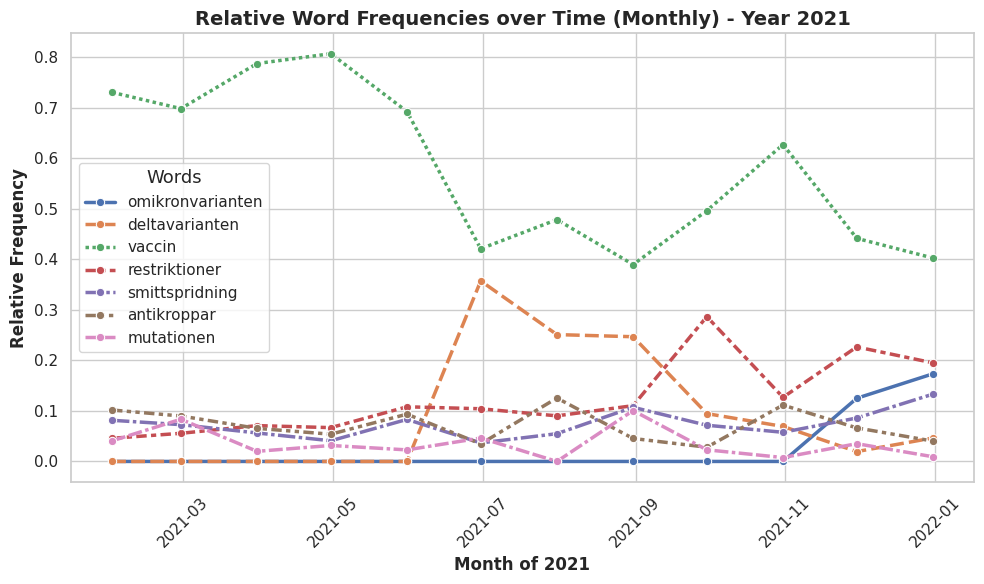

In [60]:
# Plotting
plt.figure(figsize=(10, 6))

# Line plot with thicker and smoother lines
sns.lineplot(data=word_count_df[words_to_track], linewidth=2.5, marker='o')  # Increased linewidth and added markers for smoother visualization

# Add titles and labels with slight enhancements
plt.title('Relative Word Frequencies over Time (Monthly) - Year 2021', fontsize=14, fontweight='bold')
plt.ylabel('Relative Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Month of 2021', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with clearer formatting
plt.legend(title="Words", title_fontsize='13', fontsize='11')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Acknowledgements: Inspired by:
### https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data

### Other related Colabs: [Word Clouds](https://colab.research.google.com/drive/1_ykmeh9IPaXhuqA6bQ3-UcIEUTRuLeFB?usp=sharing) --
[Building a Wordcloud with Google Colaboratory and Python](https://colab.research.google.com/drive/1Ah22ddvjWKTfhW-hgv7rRKkB0gGMGKHP)
